# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank= pd.read_csv(r"C:\Users\shruti\Desktop\Decodr\Project\Decodr Project\Bank marketing project\bank.csv", delimiter=";")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
# Renaming "y" column with "deposit"

bank.rename(columns={"y":"deposit"}, inplace=True)

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Exploration

In [7]:
# To get total number of rows 

print("Bank Marketing Dataset contains {rows} rows.".format(rows=len(bank)))

Bank Marketing Dataset contains 4521 rows.


In [8]:
# To get percentage of missing values in each columns

missing_values= bank.isnull().mean()*100
missing_values.sum()

0.0

### Categorical Columns Exploration

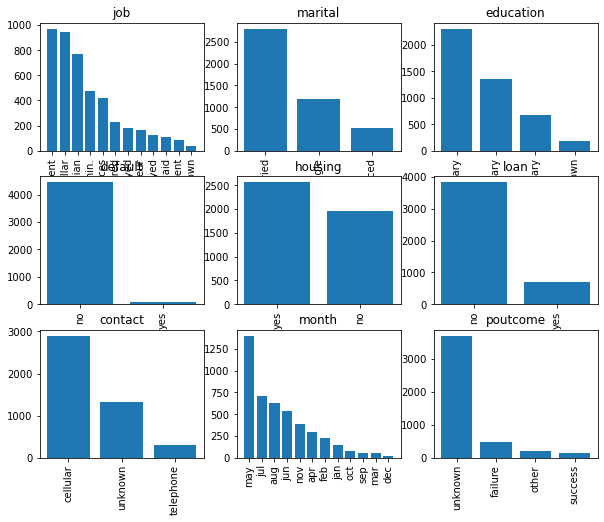

In [9]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(10, 8))

counter = 0
for cat_column in cat_columns:
    value_counts = bank[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

### Numerical Columns Exploration

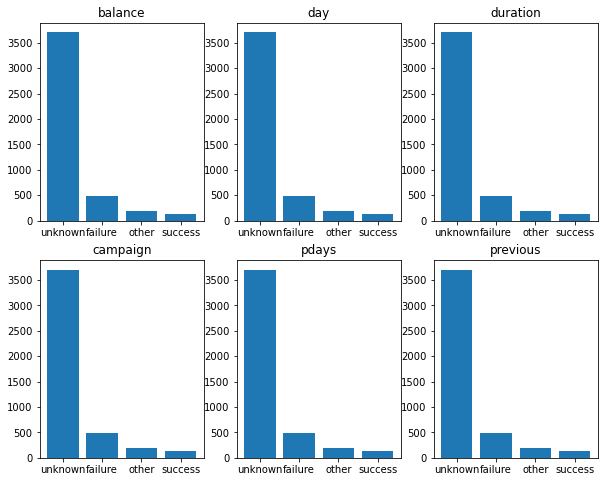

In [10]:
num_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(10, 8))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [11]:
bank[["pdays", "campaign", "previous"]].describe()

,pdays,campaign,previous
count,4521.000000,4521.000000,4521.000000
mean,39.766645,2.793630,0.542579
std,100.121124,3.109807,1.693562
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,50.000000,25.000000


In [12]:
len(bank[bank["pdays"]> 400])/ len(bank)*100

0.57509400575094

In [13]:
len(bank[bank["campaign"]> 34])/ len(bank)*100

0.04423800044238001

In [14]:
len(bank[bank["previous"]> 34])/ len(bank)*100

0.0

## Analysis of Categorical columns

<AxesSubplot:title={'center':'Deposit value counts'}>

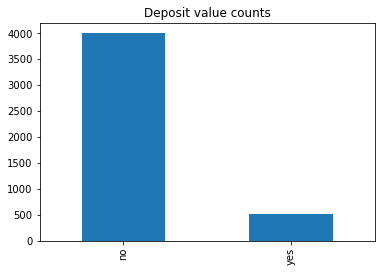

In [15]:
value_counts= bank["deposit"].value_counts()
value_counts.plot.bar(title= "Deposit value counts")

<AxesSubplot:title={'center':'Job & Deposit'}>

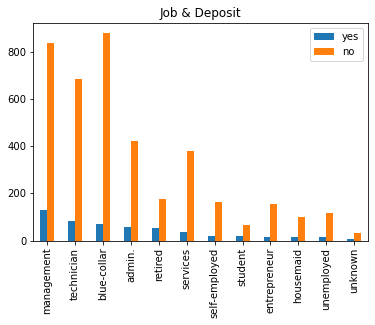

In [16]:
# Plotting Deposit Vs Jobs

j_bank= pd.DataFrame()

j_bank["yes"]= bank[bank["deposit"] == "yes"]["job"].value_counts()
j_bank["no"]= bank[bank["deposit"] == "no"]["job"].value_counts()

j_bank.plot.bar(title= "Job & Deposit")

<AxesSubplot:title={'center':'Marital Status & Deposit'}>

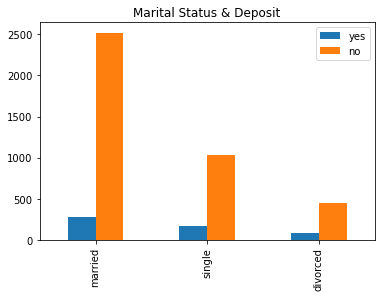

In [17]:
# Plotting Deposit Vs Marital Status

j_bank= pd.DataFrame()

j_bank["yes"]= bank[bank["deposit"] == "yes"]["marital"].value_counts()
j_bank["no"]= bank[bank["deposit"] == "no"]["marital"].value_counts()

j_bank.plot.bar(title= "Marital Status & Deposit")

<AxesSubplot:title={'center':'Education & Deposit'}>

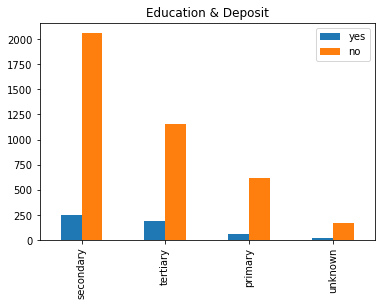

In [18]:
# Plotting Deposite Vs Education

j_bank= pd.DataFrame()

j_bank["yes"]= bank[bank["deposit"] == "yes"]["education"].value_counts()
j_bank["no"]= bank[bank["deposit"] == "no"]["education"].value_counts()

j_bank.plot.bar(title= "Education & Deposit")

<AxesSubplot:title={'center':'Contact & Deposit'}>

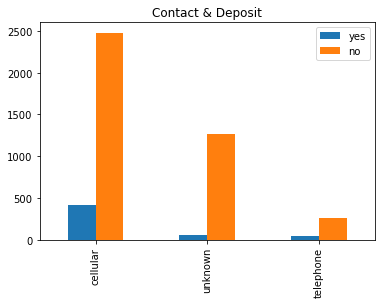

In [19]:
# Plotting Deposit Vs Contact

j_bank= pd.DataFrame()

j_bank["yes"]= bank[bank["deposit"] == "yes"]["contact"].value_counts()
j_bank["no"]= bank[bank["deposit"] == "no"]["contact"].value_counts()

j_bank.plot.bar(title= "Contact & Deposit")

## Analysis of Numeric columns

In [20]:
# Balance & Deposit

b_bank= pd.DataFrame()

b_bank['balance_yes'] = (bank[bank['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_bank['balance_no'] = (bank[bank['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_bank

,balance_yes,balance_no
count,521.000000,4000.000000
mean,1571.955854,1403.211750
std,2444.398956,3075.349313
min,-1206.000000,-3313.000000
25%,171.000000,61.000000
50%,710.000000,419.500000
75%,2160.000000,1407.000000
max,26965.000000,71188.000000


<AxesSubplot:title={'center':'Balance & Deposit Statistics'}>

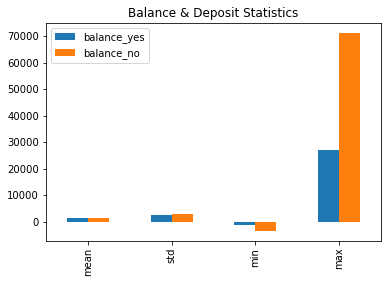

In [21]:
b_bank.drop(["count", "25%", "50%", "75%"]).plot.bar(title= "Balance & Deposit Statistics")

In [22]:
# Age & Deposit

b_bank= pd.DataFrame()

b_bank['age_yes'] = (bank[bank['deposit'] == 'yes'][['deposit','age']].describe())['age']
b_bank['age_no'] = (bank[bank['deposit'] == 'no'][['deposit','age']].describe())['age']

b_bank

,age_yes,age_no
count,521.000000,4000.000000
mean,42.491363,40.998000
std,13.115772,10.188398
min,19.000000,19.000000
25%,32.000000,33.000000
50%,40.000000,39.000000
75%,50.000000,48.000000
max,87.000000,86.000000


<AxesSubplot:title={'center':'Age & Deposit Statistics'}>

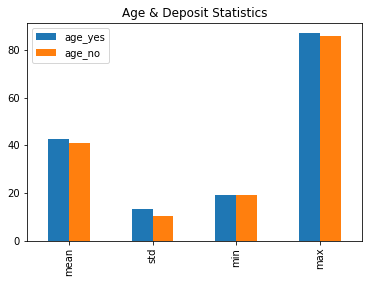

In [23]:
b_bank.drop(["count", "25%", "50%", "75%"]).plot.bar(title= "Age & Deposit Statistics")

In [24]:
# Campaign & Deposit

b_bank= pd.DataFrame()

b_bank['campaign_yes'] = (bank[bank['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
b_bank['campaign_no'] = (bank[bank['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

b_bank

,campaign_yes,campaign_no
count,521.000000,4000.000000
mean,2.266795,2.862250
std,2.092071,3.212609
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,24.000000,50.000000


<AxesSubplot:title={'center':'Campaign & Deposit Statistics'}>

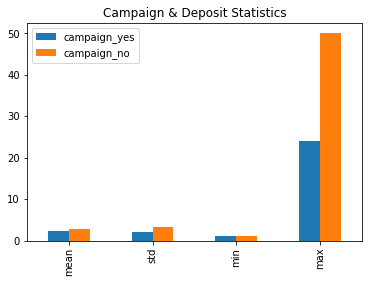

In [25]:
b_bank.drop(["count", "25%", "50%", "75%"]).plot.bar(title= "Campaign & Deposit Statistics")

In [26]:
# Previous Campaign & Deposit

b_bank= pd.DataFrame()

b_bank['previous_yes'] = (bank[bank['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
b_bank['previous_no'] = (bank[bank['deposit'] == 'no'][['deposit','previous']].describe())['previous']

b_bank

,previous_yes,previous_no
count,521.000000,4000.000000
mean,1.090211,0.471250
std,2.055368,1.627371
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,14.000000,25.000000


<AxesSubplot:title={'center':'Previous Campaign & Deposit Statistics'}>

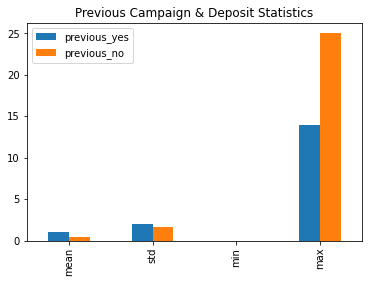

In [27]:
b_bank.drop(["count", "25%", "50%", "75%"]).plot.bar(title= "Previous Campaign & Deposit Statistics")

# Data Cleaning

In [28]:
def get_dummy_from_bool(row, column_name):
    """Returns 0 if value in column_name is no, returns 1 if value in column_name is yes"""
    return 1 if row[column_name] == "yes" else 0

def get_correct_values(row, column_name, threshold, bank):
    """Returns mean value if value in column_name is above threshold"""
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean= bank[bank[column_name] <= threshold][column_name].mean()
        return mean
    
def clean_data(bank):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_bank = bank.copy()
    
    # Converting columns containing 'yes' and 'no' values to boolean variables and drop original columns
    
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_bank[bool_col + '_bool'] = bank.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_bank = cleaned_bank.drop(columns = bool_columns)
    
    # Converting categorical columns to dummies
    
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_bank = pd.concat([cleaned_bank.drop(col, axis=1),
                                pd.get_dummies(cleaned_bank[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    # Dropping irrelevant columns
        
    cleaned_bank = cleaned_bank.drop(columns = ['pdays'])
    
    # Imputing incorrect values and drop original columns
    
    cleaned_bank['campaign_cleaned'] = bank.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_bank),axis=1)
    cleaned_bank['previous_cleaned'] = bank.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_bank),axis=1)
    
    cleaned_bank = cleaned_bank.drop(columns = ['campaign', 'previous'])
    
    return cleaned_bank

In [29]:
cleaned_bank= clean_data(bank)
cleaned_bank.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,30,1787,19,79,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1.0,0
1,33,4789,11,220,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1.0,4
2,35,1350,16,185,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
3,30,1476,3,199,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,4.0,0
4,59,0,5,226,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1.0,0


# Predicting Campaign Model

### Classification Model

In [30]:
X= cleaned_bank.drop(columns= "deposit_bool")
y= cleaned_bank[["deposit_bool"]]

In [31]:
TEST_SIZE = 0.3
RAND_STATE= 42

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= TEST_SIZE, random_state= RAND_STATE)

In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
import xgboost
import warnings

xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [44]:
xgb.fit(X_train, y_train.squeeze().values)

[19:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_train_preds= xgb.predict(X_train)
y_test_preds= xgb.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

print("XGB accuracy score for train data : %.3f and for test data : %.3f" % (accuracy_score(y_train, y_train_preds),
                                                                            accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train data : 0.977 and for test data : 0.897


# Get Feature Importance from Trained Model

In [50]:
headers= ["name", "score"]
values= sorted(zip(X_train.columns, xgb.feature_importances_), key= lambda x: x[1]*-1)
xgb_feature_importances_=pd.DataFrame(values,columns=headers)
xgb_feature_importances_

,name,score
0,poutcome_success,0.117625
1,month_oct,0.047365
2,duration,0.046050
3,contact_unknown,0.040910
4,month_jun,0.039137
5,month_mar,0.035598
6,month_jan,0.032380
7,month_may,0.030285
8,default_bool,0.029443
9,previous_cleaned,0.025304


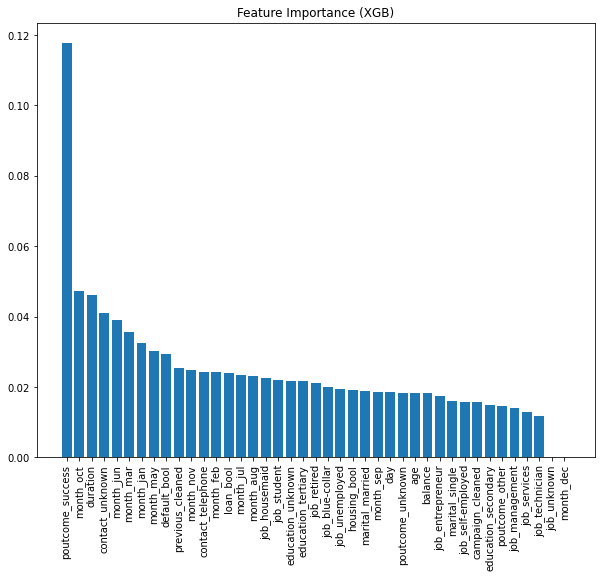

In [52]:
x_pos= np.arange(0, len(xgb_feature_importances_))
plt.figure(figsize=(10,8))
plt.bar(x_pos, xgb_feature_importances_["score"])
plt.xticks(x_pos, xgb_feature_importances_["name"])
plt.xticks(rotation=90)
plt.title("Feature Importance (XGB)")
plt.show()